Customers Columns: ['CustomerID', 'CustomerName', 'Region', 'SignupDate']
Products Columns: ['ProductID', 'ProductName', 'Category', 'Price']
Transactions Columns: ['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate', 'Quantity', 'TotalValue', 'Price']
Merged DataFrame Columns: ['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate', 'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region', 'SignupDate', 'ProductName', 'Category', 'Price_y']
Price column not found. Using TotalValue from Transactions.csv.

Top Selling Products by Revenue:
ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalSales, dtype: float64

Top Regions by Revenue:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalSales, dtype: float64

Top Customers by Total Spending:
CustomerName

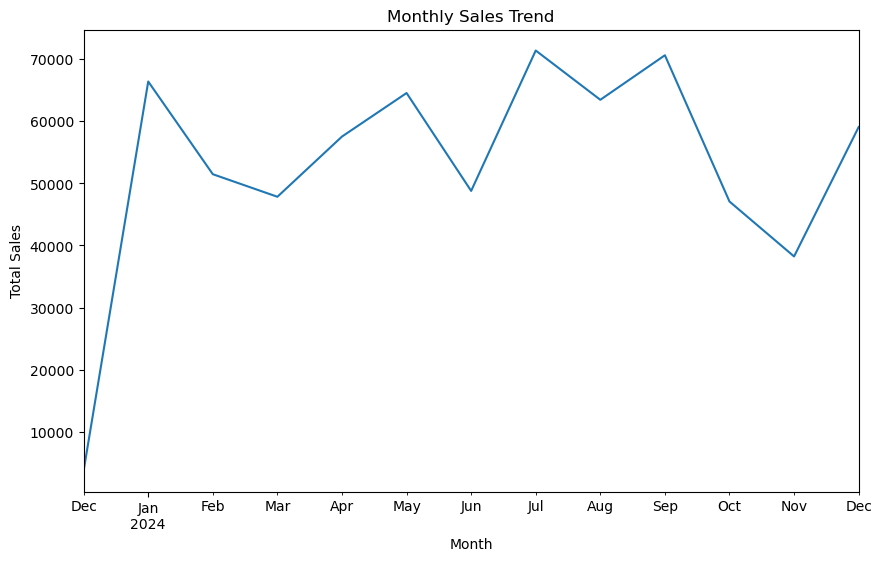

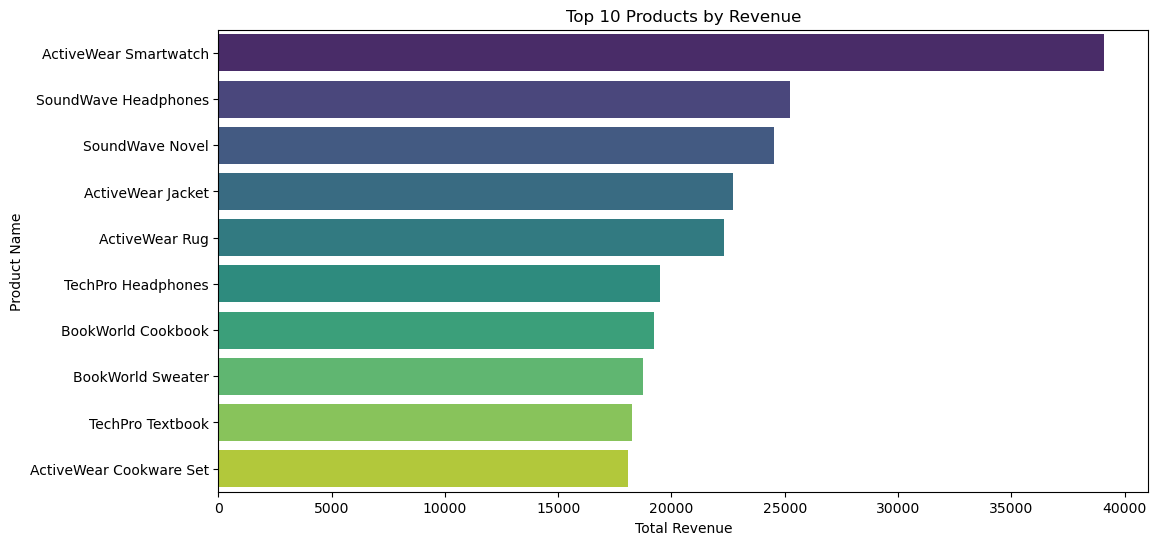

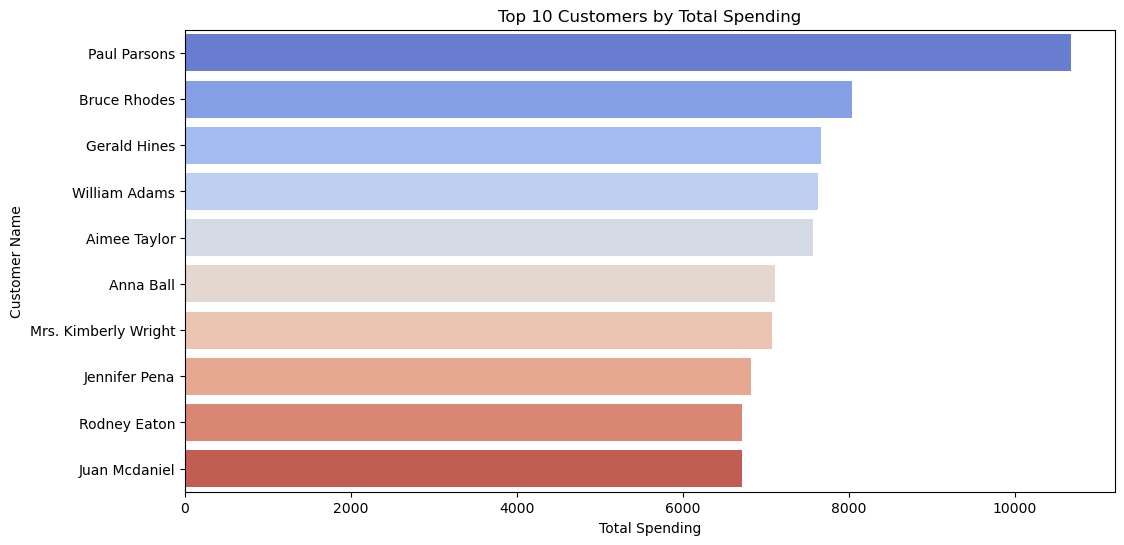

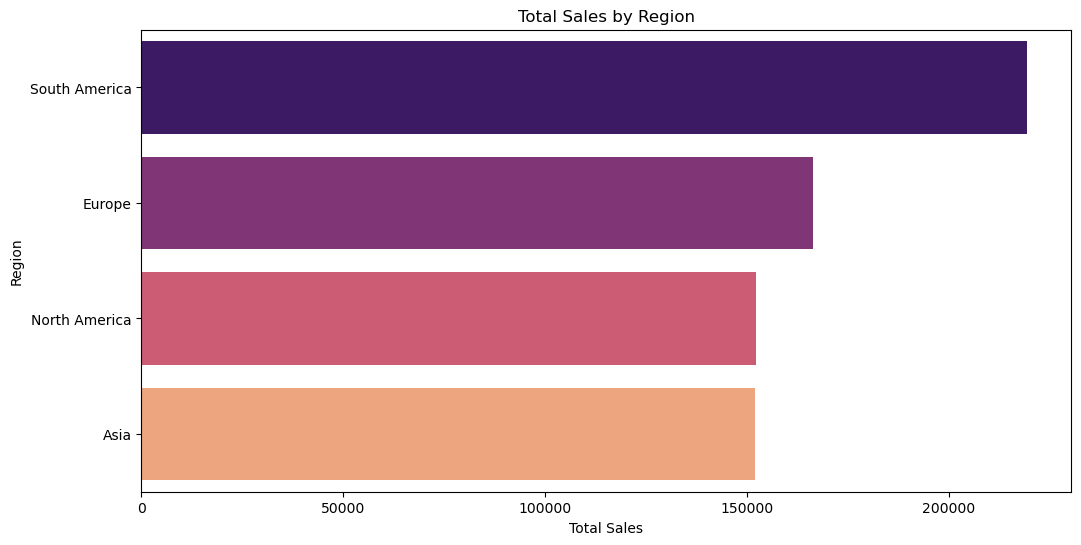

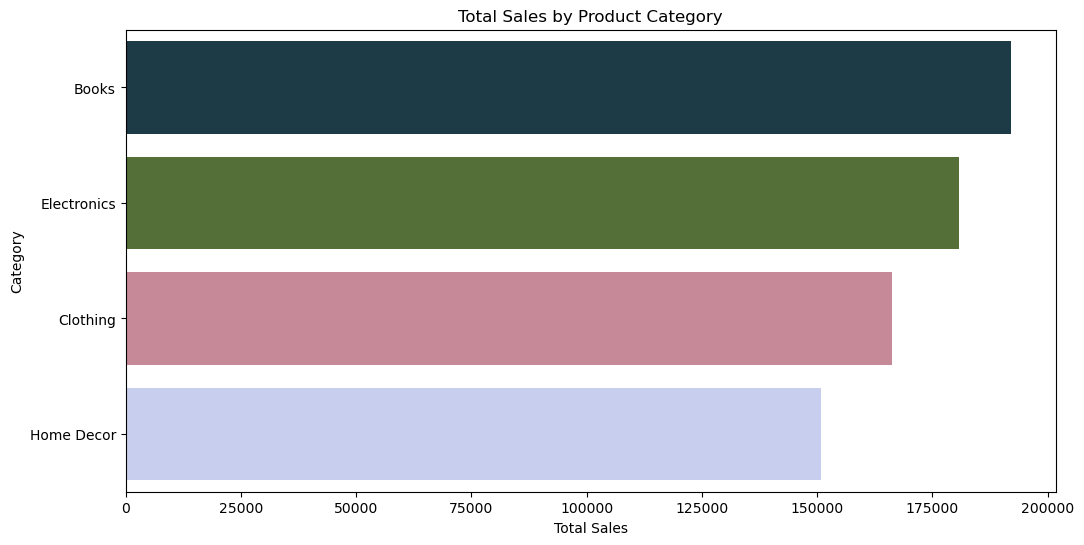

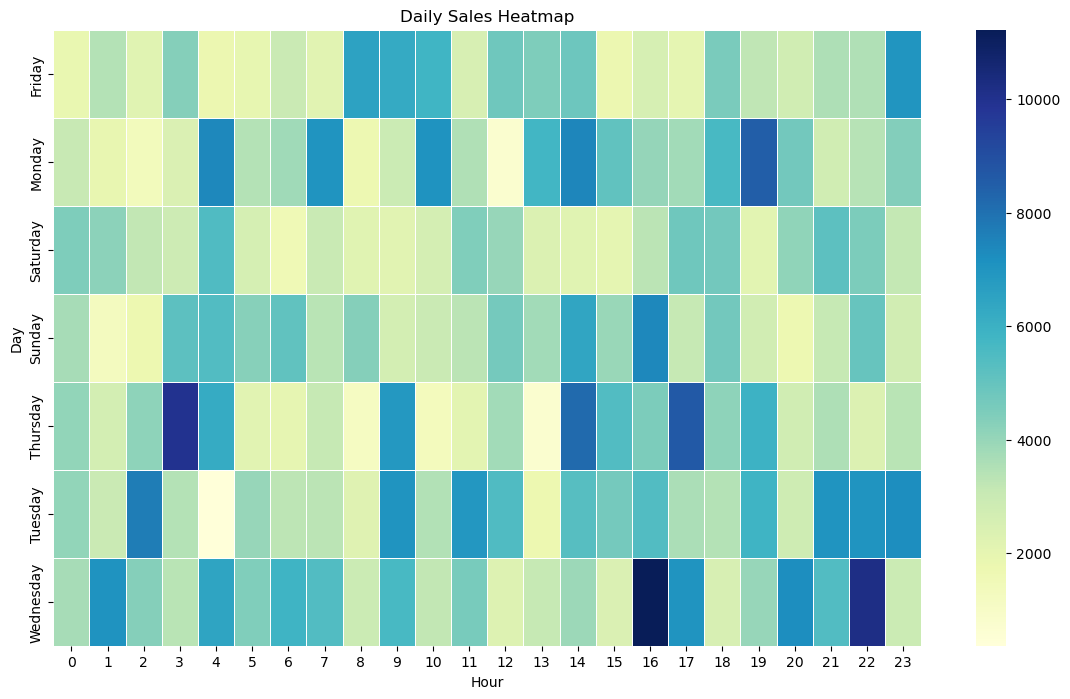

In [14]:
import pandas as pd

# Load datasets
customers_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE')
products_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0')
transactions_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF')

# Print column names for debugging
print("Customers Columns:", customers_df.columns.tolist())
print("Products Columns:", products_df.columns.tolist())
print("Transactions Columns:", transactions_df.columns.tolist())

# Rename columns if necessary
products_df.rename(columns={'price': 'Price'}, inplace=True)  # Replace 'price' with the actual column name

# Merge datasets
merged_df = pd.merge(transactions_df, customers_df, on='CustomerID', how='left')
merged_df = pd.merge(merged_df, products_df, on='ProductID', how='left')

# Print merged DataFrame columns
print("Merged DataFrame Columns:", merged_df.columns.tolist())

# Calculate TotalSales
if 'Price' in merged_df.columns:
    merged_df['TotalSales'] = merged_df['Quantity'] * merged_df['Price']
else:
    print("Price column not found. Using TotalValue from Transactions.csv.")
    merged_df['TotalSales'] = merged_df['TotalValue']

# EDA: Total Sales by Product
product_sales = merged_df.groupby('ProductName')['TotalSales'].sum().sort_values(ascending=False)
print("\nTop Selling Products by Revenue:")
print(product_sales.head())

# EDA: Total Sales by Region
region_sales = merged_df.groupby('Region')['TotalSales'].sum().sort_values(ascending=False)
print("\nTop Regions by Revenue:")
print(region_sales.head())

# EDA: Top Customers by Total Spending
top_customers = merged_df.groupby('CustomerName')['TotalSales'].sum().sort_values(ascending=False).head(10)
print("\nTop Customers by Total Spending:")
print(top_customers)

# EDA: Sales Over Time
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
monthly_sales = merged_df.groupby(merged_df['TransactionDate'].dt.to_period('M'))['TotalSales'].sum()
print("\nMonthly Sales Trend:")
print(monthly_sales)

# Plot Monthly Sales Trend
monthly_sales.plot(kind='line', figsize=(10, 6))
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# Plot 1: Top 10 Products by Revenue
plt.figure(figsize=(12, 6))
sns.barplot(x=product_sales.head(10).values, y=product_sales.head(10).index, palette='viridis')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.show()

# Plot 2: Top 10 Customers by Spending
plt.figure(figsize=(12, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='coolwarm')
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Total Spending')
plt.ylabel('Customer Name')
plt.show()

# Plot 3: Total Sales by Region
plt.figure(figsize=(12, 6))
sns.barplot(x=region_sales.values, y=region_sales.index, palette='magma')
plt.title('Total Sales by Region')
plt.xlabel('Total Sales')
plt.ylabel('Region')
plt.show()


# Plot 5: Total Sales by Product Category (if 'Category' column exists)
if 'Category' in products_df.columns:
    category_sales = merged_df.groupby('Category')['TotalSales'].sum().sort_values(ascending=False)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=category_sales.values, y=category_sales.index, palette='cubehelix')
    plt.title('Total Sales by Product Category')
    plt.xlabel('Total Sales')
    plt.ylabel('Category')
    plt.show()

# Plot 6: Total Sales by Age Group (if 'Age' column exists)
if 'Age' in customers_df.columns:
    merged_df['AgeGroup'] = pd.cut(merged_df['Age'], bins=[0, 18, 30, 45, 60, 100], labels=['<18', '18-30', '30-45', '45-60', '60+'])
    age_group_sales = merged_df.groupby('AgeGroup')['TotalSales'].sum().sort_values(ascending=False)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=age_group_sales.index, y=age_group_sales.values, palette='pastel')
    plt.title('Total Sales by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Total Sales')
    plt.show()

# Plot 7: Daily Sales Heatmap
merged_df['Day'] = merged_df['TransactionDate'].dt.day_name()
merged_df['Hour'] = merged_df['TransactionDate'].dt.hour
daily_sales_heatmap = merged_df.pivot_table(values='TotalSales', index='Day', columns='Hour', aggfunc='sum').fillna(0)
plt.figure(figsize=(14, 8))
sns.heatmap(daily_sales_heatmap, cmap='YlGnBu', annot=False, fmt='.0f', linewidths=0.5)
plt.title('Daily Sales Heatmap')
plt.xlabel('Hour')
plt.ylabel('Day')
plt.show()